## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
raw_mouse_results = mouse_metadata.merge(study_results, how="outer", on=["Mouse ID"], left_index=True)
raw_mouse_results.sort_index(inplace=True)
# Display the data table for preview
raw_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [2]:
# Checking the number of mice.
num_mice = pd.DataFrame({"# Mice": raw_mouse_results[["Mouse ID"]].nunique()})
num_mice = num_mice.reset_index()
del num_mice["index"]
num_mice

,# Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Tag mice with duplicate data based on "Mouse ID" & "Timepoint" 
raw_mouse_results["Duplicate?"] = raw_mouse_results.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
# View duplicates
duplicate_filter = raw_mouse_results.loc[raw_mouse_results["Duplicate?"] == True]
duplicate_filter

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
107,g989,Propriva,Female,21,26,0,45.000000,0,True
137,g989,Propriva,Female,21,26,0,45.000000,0,True
329,g989,Propriva,Female,21,26,5,48.786801,0,True
360,g989,Propriva,Female,21,26,5,47.570392,0,True
620,g989,Propriva,Female,21,26,10,51.745156,0,True
681,g989,Propriva,Female,21,26,10,49.880528,0,True
815,g989,Propriva,Female,21,26,15,51.325852,1,True
869,g989,Propriva,Female,21,26,15,53.442020,0,True
950,g989,Propriva,Female,21,26,20,55.326122,1,True
1111,g989,Propriva,Female,21,26,20,54.657650,1,True


In [4]:
# Optional: Get all the data for the duplicate mouse ID.  
duplicate_mouse_data = raw_mouse_results.drop(raw_mouse_results[raw_mouse_results["Mouse ID"]!="g989"].index)
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
107,g989,Propriva,Female,21,26,0,45.000000,0,True
137,g989,Propriva,Female,21,26,0,45.000000,0,True
329,g989,Propriva,Female,21,26,5,48.786801,0,True
360,g989,Propriva,Female,21,26,5,47.570392,0,True
620,g989,Propriva,Female,21,26,10,51.745156,0,True
681,g989,Propriva,Female,21,26,10,49.880528,0,True
815,g989,Propriva,Female,21,26,15,51.325852,1,True
869,g989,Propriva,Female,21,26,15,53.442020,0,True
950,g989,Propriva,Female,21,26,20,55.326122,1,True
1111,g989,Propriva,Female,21,26,20,54.657650,1,True


In [5]:
# Delete all data for the mouse with duplicate data
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = raw_mouse_results.drop(raw_mouse_results[raw_mouse_results["Mouse ID"]=="g989"].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate?
0,b128,Capomulin,Female,9,22,0,45.000000,0,False
1,f932,Ketapril,Male,15,29,0,45.000000,0,False
2,g107,Ketapril,Female,2,29,0,45.000000,0,False
3,a457,Ketapril,Female,11,30,0,45.000000,0,False
4,c819,Ketapril,Male,21,25,0,45.000000,0,False
...,...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2,False
1889,u364,Capomulin,Male,18,17,45,31.023923,3,False
1890,p438,Ceftamin,Female,11,26,45,61.433892,1,False
1891,x773,Placebo,Female,21,30,45,58.634971,4,False


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice2 = pd.DataFrame({"#Mice":clean_df[["Mouse ID"]].nunique()})
num_mice2 = num_mice2.reset_index()
del num_mice2["index"]
num_mice2

,#Mice
0,248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line


# Create data frame with "Drug Regimen" & "Tumor Volume (mm3)"
drug_tumor_data = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# Groupby isloates "Drug Regimen" to perform stats on "Tumor Volume". Pass all equations to the dataframe with .agg()
stats_table = drug_tumor_data.groupby(["Drug Regimen"]).agg(["count","mean","median","var","std","sem"])
stats_table.columns = stats_table.columns.get_level_values(1)
stats_table

,count,mean,median,var,std,sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

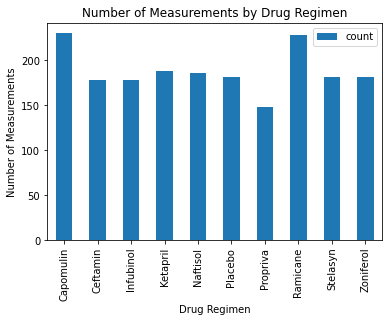

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
treatment_counts = stats_table[["count"]]

treatment_counts.plot(kind="bar")

plt.title("Number of Measurements by Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

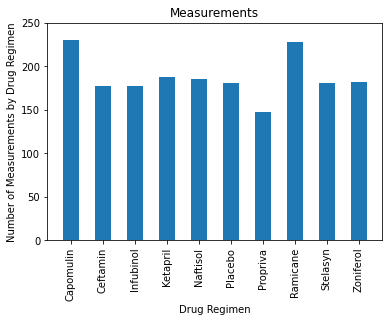

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bar_y = treatment_counts["count"]
bar_x = treatment_counts.index
plt.bar(bar_x, bar_y, width=0.5)
plt.xticks(rotation="vertical")
plt.ylim(0,250)


plt.title("Measurements")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements by Drug Regimen")
plt.show()

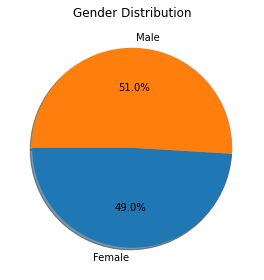

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = clean_df.groupby(["Sex"])
gender_stats = gender_group["Sex"].count()

# Generate pie from .plot()
gender_stats.plot(kind="pie", figsize=(4.6,4.6), autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

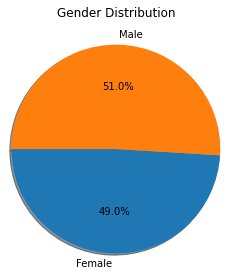

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = gender_stats.index
explode = (0.1, 0, 0, 0)

plt.pie(gender_stats,
        autopct="%1.1f%%", labels=gender, shadow=True, startangle=180, radius=1.2)
plt.title("Gender Distribution", y=1.08)
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Obtained greates timepoint & tumor values filtered by treatment group
max_timepoint = clean_df[["Mouse ID","Timepoint","Tumor Volume (mm3)","Drug Regimen"]]
max_timepoint_group = max_timepoint.groupby(["Mouse ID"])
max_timepoint = max_timepoint_group[["Timepoint"]].max().reset_index()
max_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [13]:
# Merge max timepoint dataframe with clean_df to obtain tumor volume at the max timepoint
max_timepoint_tumor = max_timepoint.merge(clean_df,on=["Mouse ID","Timepoint"],how="left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_group = [ "Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatment_group:
    timepoint_tumor_filter = max_timepoint_tumor.loc[max_timepoint_tumor["Drug Regimen"] == treatment,
                            "Tumor Volume (mm3)"]
    tumor_vol_data.append(timepoint_tumor_filter)
    
    # Determine outliers using upper and lower bounds
# quartiles = tumor_vol_data_df.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq
# print(f"The lower quartile of tumor volume (mm3) is: {lowerq}")
# print(f"The upper quartile of tumor volume (mm3) is: {upperq}")
# print(f"The interquartile range of tumor volume (mm3) is: {iqr}")
# print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]} ")
# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [15]:
tumor_vol_data_df = pd.DataFrame({"Capomulin":tumor_vol_data[0], "Ramicane":tumor_vol_data[1], 
                              "Infubinol":tumor_vol_data[2], "Ceftamin":tumor_vol_data[3]})
tumor_vol_data_df
# tumor_vol_data

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
3,NaN,NaN,NaN,62.999356
6,NaN,38.407618,NaN,NaN
7,NaN,43.047543,NaN,NaN
...,...,...,...,...
238,NaN,NaN,NaN,68.594745
239,31.896238,NaN,NaN,NaN
240,NaN,NaN,NaN,64.729837
244,NaN,30.638696,NaN,NaN


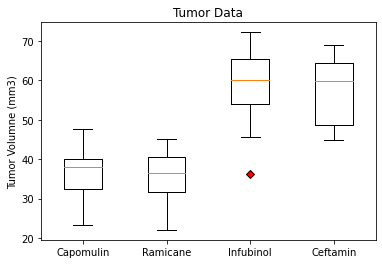

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Data')
ax1.set_ylabel('Tumor Volumne (mm3)')
ax1.boxplot(tumor_vol_data,flierprops=red_square)
ax1.set_xticklabels(treatment_group)
plt.show()

## Line and Scatter Plots

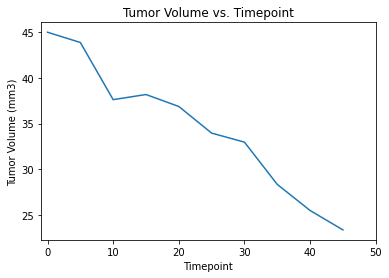

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Create x & y axis data for a mouse from the capomulin group
capomulin = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"]=="s185"]
x_capomulin_line = capomulin_mouse["Timepoint"]
y_capomulin_line = capomulin_mouse["Tumor Volume (mm3)"]

# Generate line plot
plt.plot(x_capomulin_line, y_capomulin_line)
# Labels for plot
plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
# Adjust x_axis limits
plt.xlim(-1,y_capomulin_line.max()+5)
plt.show()

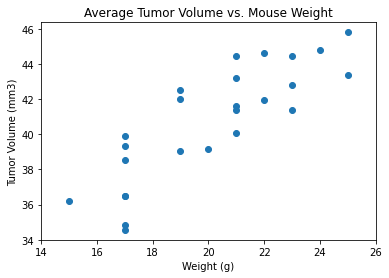

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create dataframe to obtain average tumor volume's for capomulin group
capomulin_group = capomulin.groupby(["Mouse ID"])
capomulin_avg = capomulin_group[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]].agg("mean")
# Generate scatter plot
x_capomulin_scat = capomulin_avg["Weight (g)"]
y_capomulin_scat = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x_capomulin_scat, y_capomulin_scat)
# Labels
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Adjust x axis limits
plt.xlim(14,26)
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


In [20]:
# correlation coefficient for capomulin treatment: mouse weight vs avg tumor volume
x_mouse_wt = capomulin_avg["Weight (g)"]
y_avg_tumor_vol = capomulin_avg["Tumor Volume (mm3)"]
correlation = st.pearsonr(x_capomulin_scat,y_capomulin_scat)
print(f"The correlation between mouse weight & average tumor volumne is {round(correlation[0],2)}")

The correlation between mouse weight & average tumor volumne is 0.84


The r-squared is: 0.7088568047708717


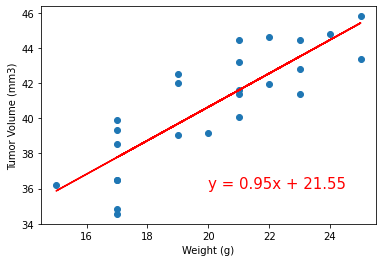

In [25]:
# Linear regression model: mouse weight vs avg tumor volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_mouse_wt, y_avg_tumor_vol)
regress_values = x_mouse_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_mouse_wt,y_avg_tumor_vol)
plt.plot(x_mouse_wt,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")